## 1. Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/신한 퓨쳐 아카데미/Project/'

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv(file_path + '서울시_부동산_전월세가_정보.csv', encoding = 'CP949')

<ipython-input-8-1ab2d887e4b0>:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path + '서울시_부동산_전월세가_정보.csv', encoding = 'CP949')


In [11]:
df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,계약일,전월세 구분,임대면적(㎡),보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2023,11260,중랑구,10200.0,상봉동,NaN,NaN,NaN,NaN,NaN,20230901,월세,59.52,3000,30,NaN,1991.0,단독다가구,NaN,NaN,NaN,NaN,NaN
1,2023,11215,광진구,10500.0,자양동,1.0,대지,229.0,39.0,2.0,20230901,전세,82.31,35000,0,(229-39),2003.0,연립다세대,23.10~25.10,신규,NaN,0.0,NaN
2,2023,11380,은평구,10300.0,불광동,1.0,대지,105.0,76.0,3.0,20230901,전세,57.76,23000,0,105-76,2018.0,연립다세대,23.09~25.09,신규,NaN,0.0,NaN
3,2023,11230,동대문구,10400.0,전농동,NaN,NaN,NaN,NaN,NaN,20230901,월세,57.57,10000,20,NaN,1996.0,단독다가구,NaN,갱신,NaN,9000.0,20.0
4,2023,11680,강남구,11200.0,자곡동,1.0,대지,655.0,0.0,6.0,20230901,월세,20.96,13000,10,\t강남 푸르지오시티 2차(PRUGIO CITYⅡ)\t,2014.0,오피스텔,NaN,NaN,NaN,NaN,NaN


## 2. EDA

In [12]:
import numpy as np

In [13]:
np.min(df[df['신규갱신여부']=='갱신']['계약일'])

20210601

In [14]:
df['접수연도'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011])

In [15]:
df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '층', '계약일', '전월세 구분', '임대면적(㎡)', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규갱신여부', '계약갱신권사용여부', '종전 보증금', '종전 임대료'],
      dtype='object')

## 3. Data Preprocessing

In [16]:
df_real = df[df['접수연도'] == 2023].reset_index(drop = True)
df_js = df_real[df_real['전월세 구분'] == '전세'].reset_index(drop = True)
df_contract = df_js[df_js['신규갱신여부'] == '갱신'].reset_index(drop = True)

In [17]:
df_contract['target'] = (df_contract['보증금(만원)'] < df_contract['종전 보증금']).astype(int)

In [18]:
np.min(df_contract['계약일'])

20221106

In [ ]:
df_contract[df_contract['계약일']==np.min(df_contract['계약일'])]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,계약일,전월세 구분,임대면적(㎡),보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료,target
47381,2023,11740,강동구,10300.0,상일동,1.0,대지,515.0,0.0,19.0,20221106,전세,84.85,65000,0,고덕숲아이파크,2018.0,아파트,23.01~25.01,갱신,NaN,64050.0,NaN,0


In [ ]:
df_contract.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,계약일,전월세 구분,임대면적(㎡),보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료,target
0,2023,11470,양천구,10200.0,목동,1.0,대지,623.0,4.0,2.0,20230901,전세,29.20,20300,0,삼성쉐르빌,2014.0,연립다세대,NaN,갱신,NaN,20300.0,NaN,0
1,2023,11200,성동구,11500.0,성수동2가,1.0,대지,835.0,0.0,14.0,20230901,전세,102.00,80000,0,롯데캐슬파크,2003.0,아파트,23.09~25.09,갱신,○,85000.0,NaN,1
2,2023,11215,광진구,10500.0,자양동,1.0,대지,227.0,7.0,13.0,20230901,전세,149.79,140000,0,더샵스타시티,2007.0,오피스텔,NaN,갱신,○,140000.0,NaN,0
3,2023,11530,구로구,10600.0,고척동,1.0,대지,328.0,0.0,2.0,20230901,전세,71.10,31000,0,양우,2000.0,아파트,23.09~25.09,갱신,NaN,38000.0,NaN,1
4,2023,11380,은평구,10300.0,불광동,1.0,대지,645.0,0.0,10.0,20230901,전세,84.99,58000,0,불광롯데캐슬,2018.0,아파트,23.10~25.10,갱신,○,63000.0,NaN,1


In [ ]:
df_contract.shape

(47382, 24)

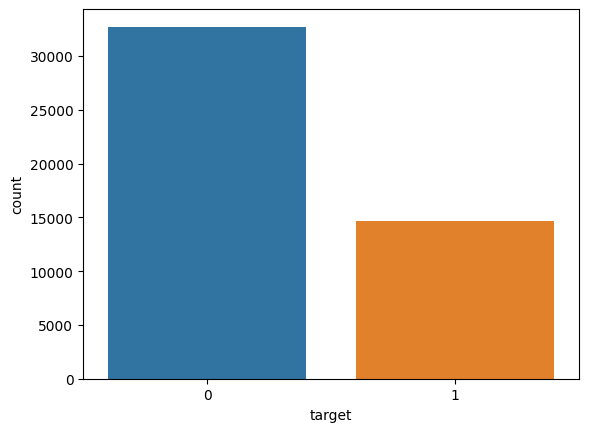

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x = 'target', data = df_contract)
plt.show()

In [ ]:
df_1 = df[df['전월세 구분'] == '전세'].reset_index(drop = True)
df_2 = df_1[df_1['신규갱신여부'] == '갱신'].reset_index(drop = True)
df_2['target'] = (df_2['보증금(만원)'] < df_2['종전 보증금']).astype(int)

In [ ]:
df_2.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,계약일,전월세 구분,임대면적(㎡),보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료,target
0,2023,11470,양천구,10200.0,목동,1.0,대지,623.0,4.0,2.0,20230901,전세,29.20,20300,0,삼성쉐르빌,2014.0,연립다세대,NaN,갱신,NaN,20300.0,NaN,0
1,2023,11200,성동구,11500.0,성수동2가,1.0,대지,835.0,0.0,14.0,20230901,전세,102.00,80000,0,롯데캐슬파크,2003.0,아파트,23.09~25.09,갱신,○,85000.0,NaN,1
2,2023,11215,광진구,10500.0,자양동,1.0,대지,227.0,7.0,13.0,20230901,전세,149.79,140000,0,더샵스타시티,2007.0,오피스텔,NaN,갱신,○,140000.0,NaN,0
3,2023,11530,구로구,10600.0,고척동,1.0,대지,328.0,0.0,2.0,20230901,전세,71.10,31000,0,양우,2000.0,아파트,23.09~25.09,갱신,NaN,38000.0,NaN,1
4,2023,11380,은평구,10300.0,불광동,1.0,대지,645.0,0.0,10.0,20230901,전세,84.99,58000,0,불광롯데캐슬,2018.0,아파트,23.10~25.10,갱신,○,63000.0,NaN,1


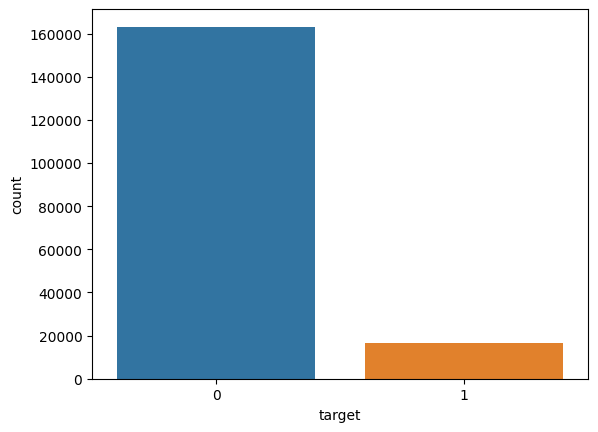

In [ ]:
sns.countplot(x = 'target', data = df_2)
plt.show()